# PaleoClimate Plot Data

In [ ]:
import geopandas as gpd
import folium
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np


### The dataset with information about paleoclimate, collected by research geologists: 
   - Age - Geological age of evidence. 
   - lat, long - The geographic coordinates of the evidence. 
   - basin - Belonging river basin. 
   - Climate - Climate reference(h = hot, s = semiarid, t = tropical)

In [19]:
climate_data = pd.read_csv('dataset/points.csv')
climate_data.head()


,age,basin,lat,long,climate
0,145,camamu-almada,-13.83,-38.5,h
1,145,camamu-almada,-13.83,-38.5,h
2,145,camamu-almada,-13.83,-38.5,h
3,140,araripe,-7.50,-39.5,h
4,140,Camamu-almada,-13.83,-38.5,h


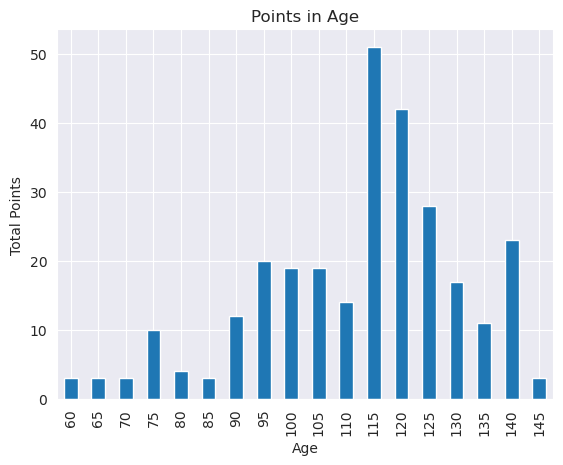

In [22]:
import matplotlib.pyplot as plt


valores_unicos = climate_data['age'].value_counts().sort_index()

# Crie o gráfico de barras
valores_unicos.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Total Points')
plt.title('Points in Age')
plt.show()


## Apply de dataset points into map


In [20]:
# Crie o mapa inicial
paleomap = folium.Map(location=[-10.221762, -51.603577], zoom_start=4)

# Adicione os marcadores ao mapa
for i, row in climate_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['climate']
    ).add_to(paleomap)
paleomap